

# Instalación de librerias

In [1]:
# Librería para manejar las contracciones que se presentan en el inglés.
# Manejo de texto
!pip install contractions inflect num2words bs4

# Visualización
!pip install scikit-plot

# Perfilado de datos
!pip install pandas-profiling


  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.2
    Uninstalling joblib-1.5.2:
      Successfully uninstalled joblib-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.14.0 requires joblib<2,>=1.2.0, but you have joblib 1.1.1 which is incompatible.
scikit-learn 1.6.1 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.


In [2]:
import nltk

# Tokenizadores
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [3]:
# Manejo de datos
import pandas as pd
import numpy as np

# Texto / NLP
import re, string, unicodedata
import contractions
import inflect
from bs4 import BeautifulSoup
from num2words import num2words

# NLTK
from nltk import word_tokenize, sent_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

# Scikit-learn
from sklearn.model_selection import (
    train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
)
from sklearn.feature_extraction.text import (
    TfidfVectorizer, CountVectorizer, HashingVectorizer
)
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Estadística
from scipy import stats as st
from statistics import mean

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
!pip install spacy
!python -m spacy download es_core_news_sm

import spacy
nlp = spacy.load("es_core_news_sm")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 38.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Entendimiento y preparación de datos


In [5]:
data_t = pd.read_excel("Datos_proyecto.xlsx")

data_t

,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3
...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1
2422,"Sin embargo, estas fallas del mercado implican...",3


In [6]:


textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['textos']]
#textos['Moda'] =
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['textos']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['textos']]
textos['Mean'] = [[mean([len(x) for x in i.split(' ')])][0] for i in textos['textos']]
# Se realiza un perfilamiento de los datos con la librería pandas profiling
#ProfileReport(textos)

In [7]:
textos

,textos,labels,Conteo,Max,Min,Mean
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,352,14,1,6.354167
1,Para los niños más pequeños (bebés y niños peq...,4,516,16,1,6.180556
2,"Además, la formación de especialistas en medic...",3,659,15,1,6.096774
3,En los países de la OCDE se tiende a pasar de ...,4,693,18,1,5.366972
4,Este grupo se centró en las personas que padec...,3,608,14,0,5.410526
...,...,...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,741,16,1,5.566372
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,541,15,1,5.376471
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,352,12,1,4.515625
2422,"Sin embargo, estas fallas del mercado implican...",3,754,15,1,4.852713


In [8]:
data_t['words'] = data_t['textos'].apply(word_tokenize)
data_t.head()

,textos,labels,words
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,..."
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,..."
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q..."


In [9]:

STOPWORDS = set(stopwords.words('spanish'))


STOPWORDS = set(stopwords.words('spanish'))
stemmer = SnowballStemmer("spanish")

def remove_non_ascii(words):
    return [unicodedata.normalize('NFKC', w) for w in words]

def to_lowercase(words):
    return [w.lower() for w in words]

def remove_punctuation(words):
    cleaned = [re.sub(r'[^\w\s]', '', w) for w in words]
    return [w for w in cleaned if w != '']

def replace_numbers(words):
    new = []
    for w in words:
        if w.isdigit():
            new.append(num2words(w, lang='es'))
        else:
            new.append(w)
    return new

def remove_stopwords(words):
    return [w for w in words if w not in STOPWORDS]

def stem_words(words):
    return [stemmer.stem(w) for w in words]

def normalize(text):
    words = wordpunct_tokenize(text)  # tokenización en español
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    words = stem_words(words)   # o puedes quitar esta línea si prefieres lemas
    return words

# Aplicar a tu DataFrame
data_t['words'] = data_t['textos'].apply(normalize)

In [10]:
data_t['words'].dropna()

,words
0,"[aprendizaj, educ, consider, sinon, escolariz,..."
1,"[niñ, pequeñ, bebes, niñ, pequeñ, capacit, esp..."
2,"[ademas, formacion, especial, medicin, general..."
3,"[pais, ocde, tiend, pas, curs, obligatori, opt..."
4,"[grup, centr, person, padec, trastorn, mental,..."
...,...
2419,"[tutor, carrer, diseñ, apoy, estudi, consecu, ..."
2420,"[fuent, ministeri, educ, tas, intern, retorn, ..."
2421,"[dos mil diez, pnud, sid, pioner, puest, march..."
2422,"[embarg, fall, merc, implic, competent, sol, s..."


In [11]:
data_t['words'] = data_t['words'].apply(lambda x: ' '.join(map(str, x)))
data_t

,textos,labels,words
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,aprendizaj educ consider sinon escolariz forma...
1,Para los niños más pequeños (bebés y niños peq...,4,niñ pequeñ bebes niñ pequeñ capacit especializ...
2,"Además, la formación de especialistas en medic...",3,ademas formacion especial medicin general incl...
3,En los países de la OCDE se tiende a pasar de ...,4,pais ocde tiend pas curs obligatori optat abie...
4,Este grupo se centró en las personas que padec...,3,grup centr person padec trastorn mental comorb...
...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,tutor carrer diseñ apoy estudi consecu objet p...
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,fuent ministeri educ tas intern retorn tir edu...
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,dos mil diez pnud sid pioner puest march prese...
2422,"Sin embargo, estas fallas del mercado implican...",3,embarg fall merc implic competent sol suficien...


In [12]:
class_counts = data_t['labels'].value_counts()
ratio = class_counts / class_counts.sum()
display(ratio.to_frame('proporcion'))


,proporcion
labels,
4,0.422855
3,0.368812
1,0.208333


# Modelo Logistic Regretion

In [13]:
X_data, y_data = data_t['words'],data_t['labels']
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.25, random_state=42
)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LR + TF-IDF
Accuracy (test): 0.9719

Reporte de clasificación:
              precision    recall  f1-score   support

           1      0.935     0.963     0.949       135
           3      0.976     0.976     0.976       210
           4      0.988     0.973     0.981       261

    accuracy                          0.972       606
   macro avg      0.967     0.971     0.969       606
weighted avg      0.972     0.972     0.972       606



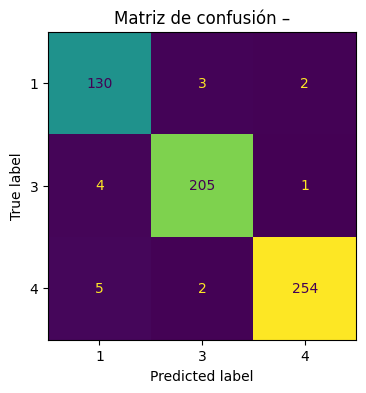

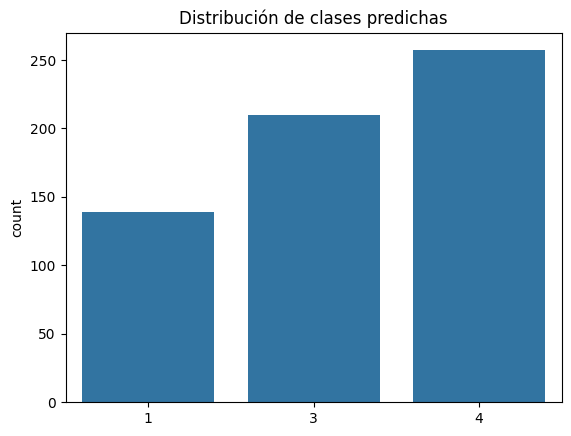

In [14]:


clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression(
        max_iter=1000,
        multi_class='multinomial',
        class_weight='balanced'
    ))
])

clf.fit(X_train, y_train)
y_predlg = clf.predict(X_test)

classes = np.unique(y_train)
target_names = [str(c) for c in classes]

    # Accuracy
acc = accuracy_score(y_test, y_predlg)
print(f"LR + TF-IDF")
print("Accuracy (test):", round(acc, 4))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_predlg, labels=classes, target_names=target_names, digits=3))


cm = confusion_matrix(y_test, y_predlg, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax, colorbar=False)
plt.title(f"Matriz de confusión –")
plt.show()



sns.countplot(x=y_predlg)
plt.title("Distribución de clases predichas")
plt.show()

In [15]:
import numpy as np

feature_names = clf.named_steps['tfidf'].get_feature_names_out()
coefs = clf.named_steps['logreg'].coef_

for i, ods in enumerate(clf.classes_):
    top10 = np.argsort(coefs[i])[-10:]
    print(f"\nODS {ods} → palabras clave: {', '.join(feature_names[top10])}")



ODS 1 → palabras clave: transferent, niñ, hog, proteccion, social, privacion, hogar, ingres, pobr, pobrez

ODS 3 → palabras clave: alcohol, hospital, mortal, mental, enfermedad, sanitari, pacient, medic, atencion, salud

ODS 4 → palabras clave: evalu, enseñ, habil, profesor, aprendizaj, alumn, docent, estudi, escuel, educ


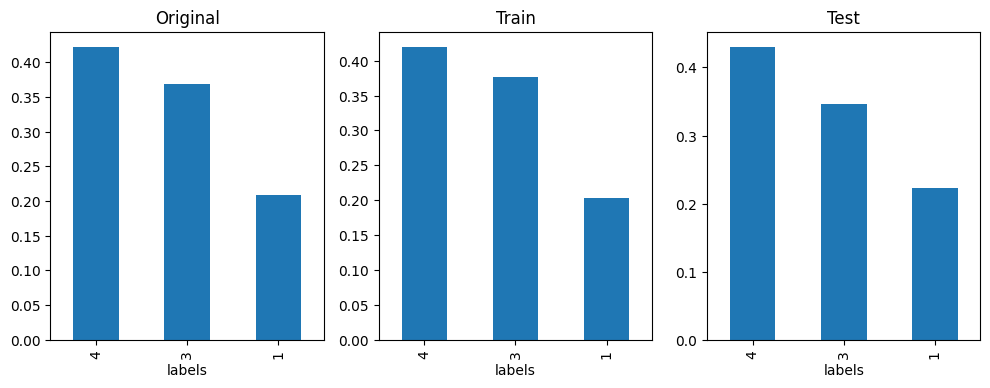

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(12,4))

data_t['labels'].value_counts(normalize=True).plot.bar(ax=ax[0], title="Original")
y_train.value_counts(normalize=True).plot.bar(ax=ax[1], title="Train")
y_test.value_counts(normalize=True).plot.bar(ax=ax[2], title="Test")

plt.show()


# Modelo KNN usando bow con k = 5


In [17]:


X_trainknn5, X_testknn5, y_trainknn5, y_testknn5 = train_test_split(
    X_data, y_data, test_size=0.25, random_state=42, stratify=y_data
)

pipe_knn = Pipeline([
    ('bow', CountVectorizer(binary=True, min_df=2)),
    ('knn', KNeighborsClassifier(
        n_neighbors=5,
        metric='cosine',
        algorithm='brute',
        weights='distance'
    ))
])

pipe_knn.fit(X_trainknn5, y_trainknn5)
y_predknn5 = pipe_knn.predict(X_testknn5)




=== k= 5 usando bow ===
Accuracy (test): 0.9241

Reporte de clasificación:
              precision    recall  f1-score   support

           1      0.907     0.849     0.877       126
           3      0.936     0.915     0.926       224
           4      0.922     0.969     0.945       256

    accuracy                          0.924       606
   macro avg      0.922     0.911     0.916       606
weighted avg      0.924     0.924     0.924       606



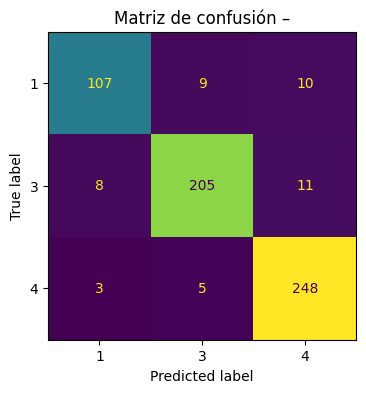

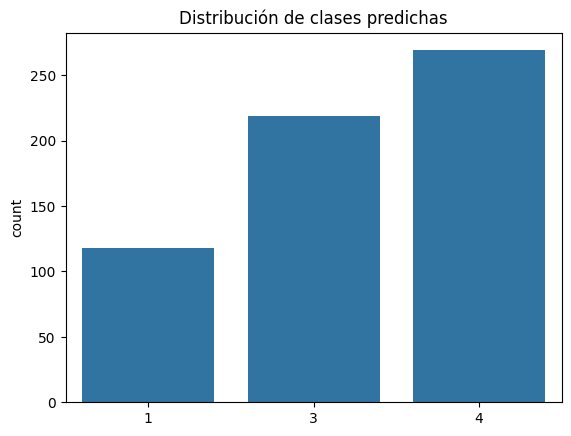

In [18]:
classes = np.unique(y_train)
target_names = [str(c) for c in classes]
import seaborn as sns
    # Accuracy
acc = accuracy_score(y_testknn5, y_predknn5)
print(f"\n=== k= 5 usando bow ===")
print("Accuracy (test):", round(acc, 4))
print("\nReporte de clasificación:")
print(classification_report(y_testknn5, y_predknn5, labels=classes, target_names=target_names, digits=3))


cm = confusion_matrix(y_testknn5, y_predknn5, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax, colorbar=False)
plt.title(f"Matriz de confusión –")
plt.show()



sns.countplot(x=y_predknn5)
plt.title("Distribución de clases predichas")
plt.show()

# Modelo KNN usando TfidfVectorizer

In [19]:
def evaluar_knn(pipeline, X_train, y_train, X_test, y_test, titulo="KNN"):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Probabilidades (si están disponibles)
    y_proba = None
    if hasattr(pipeline.named_steps['knn'], "predict_proba"):
        try:
            y_proba = pipeline.predict_proba(X_test)
        except Exception:
            pass

    # Definir nombres de clases
    classes = np.unique(y_train)
    target_names = [str(c) for c in classes]

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== {titulo} ===")
    print("Accuracy (test):", round(acc, 4))

    # Reporte
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred, labels=classes, target_names=target_names, digits=3))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    fig, ax = plt.subplots(figsize=(5, 4))
    disp.plot(ax=ax, colorbar=False)
    plt.title(f"Matriz de confusión – {titulo}")
    plt.show()

    # ROC-AUC multiclase (si hay proba)
    if y_proba is not None:
        from sklearn.preprocessing import label_binarize
        from sklearn.metrics import roc_auc_score, RocCurveDisplay

        y_test_bin = label_binarize(y_test, classes=classes)
        auc = roc_auc_score(y_test_bin, y_proba, average="macro", multi_class="ovr")
        print("ROC AUC (macro OvR):", round(auc, 4))

        for i, c in enumerate(classes):
            RocCurveDisplay.from_predictions(y_test_bin[:, i], y_proba[:, i], name=f"Clase {c}")
        plt.title(f"Curvas ROC – {titulo}")
        plt.show()




=== KNN Default (k=5, Euclídea) ===
Accuracy (test): 0.9488

Reporte de clasificación:
              precision    recall  f1-score   support

           1      0.921     0.921     0.921       126
           3      0.955     0.955     0.955       224
           4      0.957     0.957     0.957       256

    accuracy                          0.949       606
   macro avg      0.944     0.944     0.944       606
weighted avg      0.949     0.949     0.949       606



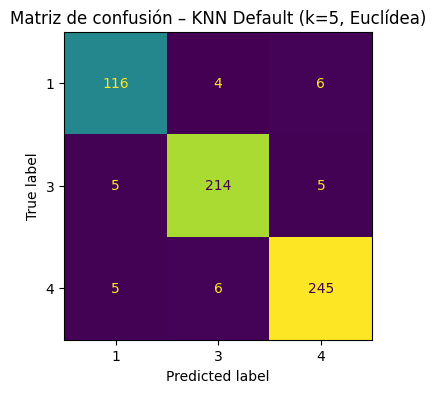

ROC AUC (macro OvR): 0.9908


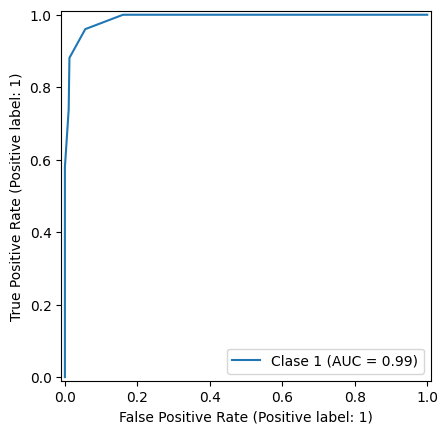

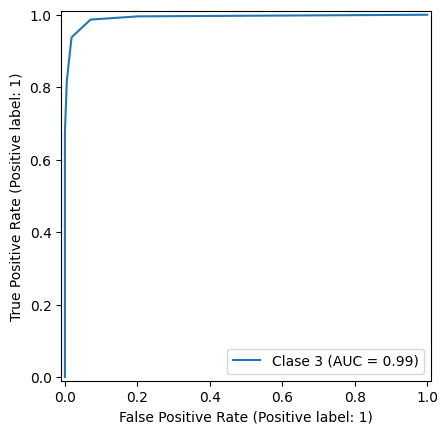

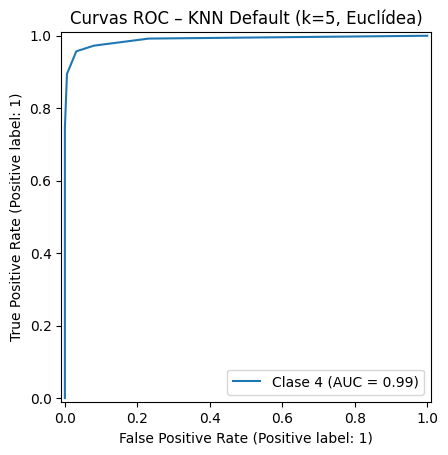

In [20]:
pipe_default = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), min_df=2, max_df=0.9)),
    ("knn", KNeighborsClassifier())
])
evaluar_knn(pipe_default, X_trainknn5, y_trainknn5, X_testknn5, y_testknn5, titulo="KNN Default (k=5, Euclídea)")

# Modelo Árboles de decisión

In [21]:
x = data_t['words']
y = data_t['labels']

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42, stratify=y
)

pipe_tree = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('tree', DecisionTreeClassifier(
        criterion='gini',
        max_depth=3,
        random_state=42
    ))
])

pipe_tree.fit(X_train, y_train)
y_preddt = pipe_tree.predict(X_test)

acc = accuracy_score(y_test, y_preddt)

y_proba = pipe_tree.predict_proba(X_test)
roc = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")
print(f"\n=== Entropía ===")
print("Accuracy (test):", round(acc, 4))
print("ROC AUC (macro OvR):", round(roc, 4))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_preddt))


=== Entropía ===
Accuracy (test): 0.7178
ROC AUC (macro OvR): 0.897

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.89      0.71      0.79       126
           3       0.58      0.94      0.72       224
           4       0.93      0.53      0.67       256

    accuracy                           0.72       606
   macro avg       0.80      0.73      0.73       606
weighted avg       0.79      0.72      0.72       606



## Gráficas relacionadas al árbol de decisión


### Árbol de decisiones

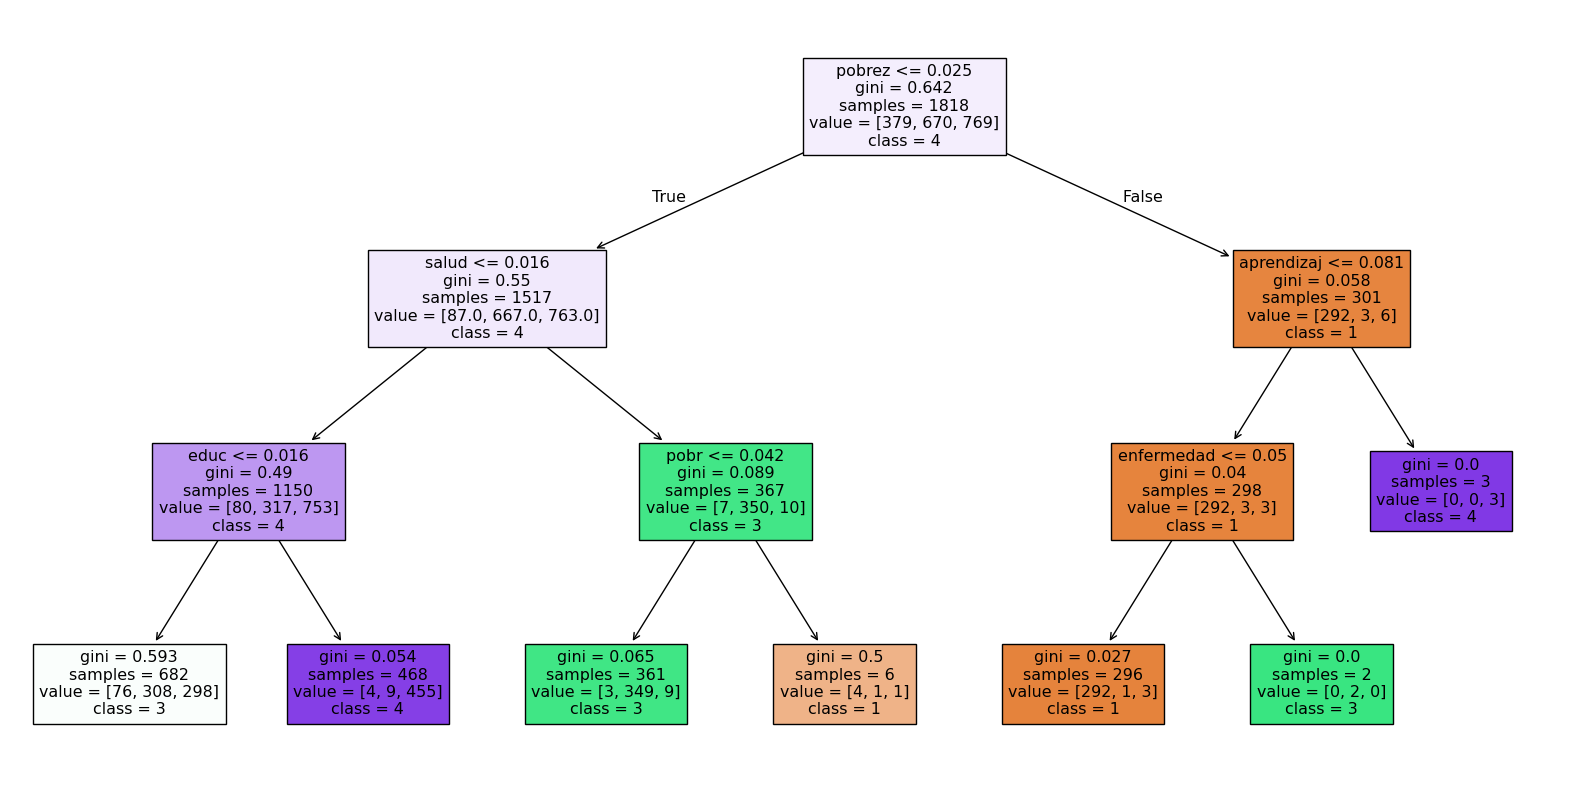

In [22]:
clf = pipe_tree.named_steps['tree']
vectorizer = pipe_tree.named_steps['tfidf']

plt.figure(figsize=(20,10))
plot_tree(clf,
          filled=True,
          feature_names=vectorizer.get_feature_names_out(),
          class_names=[str(c) for c in clf.classes_],
          max_depth=3)
plt.show()

### Mapa de confusión

In [23]:
cm = confusion_matrix(y_test, y_preddt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt.classes_,
            yticklabels=dt.classes_)
plt.title('Matriz de confusión - Árbol de decisión')
plt.xlabel('Predicciones')
plt.ylabel('Etiqueta reales')
plt.show()

NameError: name 'dt' is not defined

<Figure size 600x400 with 0 Axes>

### Curva ROC

In [ ]:
classes = pipe_tree.classes_
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure()
for i, c in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Clase {c} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # referencia
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC — Árbol de decisión (multiclase)")
plt.legend(loc="lower right")
plt.show()

### Top 12 importancias - Gini

In [ ]:
clf = pipe_tree.named_steps['tree']
vectorizer = pipe_tree.named_steps['tfidf']

importances = clf.feature_importances_
feature_names = vectorizer.get_feature_names_out()

indices = np.argsort(importances)[::-1][:12]  # top 12

plt.figure(figsize=(10,5))
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
plt.title("Top 12 Importancias — Gini")
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.show()

# Pipe line

In [ ]:
import pandas as pd



df_prueba = pd.read_excel("Datos de prueba_proyecto.xlsx")

df_prueba['words'] = df_prueba['Textos_espanol'].apply(word_tokenize)
df_prueba['words'] = df_prueba['Textos_espanol'].apply(normalize)
df_prueba['words'] = df_prueba['words'].apply(lambda x: ' '.join(map(str, x)))

labelsfinal = clf.predict(df_prueba['words'])
df_prueba['ODS'] = labelsfinal
df_prueba = df_prueba.drop(columns=['words'])
df_prueba.to_excel('ODS_final.xlsx', index=False)

